In [0]:
!pip install git+https://github.com/samoturk/mol2vec;
from rdkit import Chem 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec

# from csv import writer
# from csv import reader
# from csv import DictReader
# from csv import DictWriter

  Cloning https://github.com/samoturk/mol2vec to /tmp/pip-req-build-w4n7ajsh
  Running command git clone -q https://github.com/samoturk/mol2vec /tmp/pip-req-build-w4n7ajsh
  Created wheel for mol2vec: filename=mol2vec-0.1-cp36-none-any.whl size=14026 sha256=236d4d3b5f4acf08ebb19252399acb7480c802a68f2640b97417ed96b33fdd58
  Stored in directory: /tmp/pip-ephem-wheel-cache-joud4nxy/wheels/96/0f/2d/a1092b9677c96453dc244b209544cac61bc8b974cbffb50063
Successfully built mol2vec


In [0]:

import sys
import os
import requests
import subprocess
import shutil
from logging import getLogger, StreamHandler, INFO


logger = getLogger(__name__)
logger.addHandler(StreamHandler())
logger.setLevel(INFO)


def install(
        chunk_size=4096,
        file_name="Miniconda3-latest-Linux-x86_64.sh",
        url_base="https://repo.continuum.io/miniconda/",
        conda_path=os.path.expanduser(os.path.join("~", "miniconda")),
        rdkit_version=None,
        add_python_path=True,
        force=False):
    """install rdkit from miniconda
    ```
    import rdkit_installer
    rdkit_installer.install()
    ```
    """

    python_path = os.path.join(
        conda_path,
        "lib",
        "python{0}.{1}".format(*sys.version_info),
        "site-packages",
    )

    if add_python_path and python_path not in sys.path:
        logger.info("add {} to PYTHONPATH".format(python_path))
        sys.path.append(python_path)

    if os.path.isdir(os.path.join(python_path, "rdkit")):
        logger.info("rdkit is already installed")
        if not force:
            return

        logger.info("force re-install")

    url = url_base + file_name
    python_version = "{0}.{1}.{2}".format(*sys.version_info)

    logger.info("python version: {}".format(python_version))

    if os.path.isdir(conda_path):
        logger.warning("remove current miniconda")
        shutil.rmtree(conda_path)
    elif os.path.isfile(conda_path):
        logger.warning("remove {}".format(conda_path))
        os.remove(conda_path)

    logger.info('fetching installer from {}'.format(url))
    res = requests.get(url, stream=True)
    res.raise_for_status()
    with open(file_name, 'wb') as f:
        for chunk in res.iter_content(chunk_size):
            f.write(chunk)
    logger.info('done')

    logger.info('installing miniconda to {}'.format(conda_path))
    subprocess.check_call(["bash", file_name, "-b", "-p", conda_path])
    logger.info('done')

    logger.info("installing rdkit")
    subprocess.check_call([
        os.path.join(conda_path, "bin", "conda"),
        "install",
        "--yes",
        "-c", "rdkit",
        "python=={}".format(python_version),
        "rdkit" if rdkit_version is None else "rdkit=={}".format(rdkit_version)])
    logger.info("done")

    import rdkit
    logger.info("rdkit-{} installation finished!".format(rdkit.__version__))


if __name__ == "__main__":
    install()
from gensim.models import word2vec

rdkit is already installed
rdkit is already installed


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mol2vec.features import mol2alt_sentence, mol2sentence
from mol2vec.features import MolSentence, DfVec, sentences2vec
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
from sklearn.svm import SVR
class Regression:
  df = None
  y  = None
  ridge = None
  def __init__(self,Data,c):
    self.ridge = SVR(kernel='rbf',C=c, epsilon=0.2)
    self.df = Data
    self.y = Data['Binding Affinity']
    # print( self.df)
    self.df.drop(columns='Binding Affinity',inplace=True)
    #print(self.df.shape)
    #print( self.y.shape)
    #print(self.df)
   # print( self.y)

  def Preprocessing(self,df_X):
    model = word2vec.Word2Vec.load('/content/drive/My Drive/model_300dim_kaggle.pkl')
    df_X['mol'] = df_X['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
    df_X['sentence'] = df_X.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
    df_X['mol2vec'] = [DfVec(x) for x in sentences2vec(df_X['sentence'], model, unseen='UNK')]
    X = np.array([x.vec for x in df_X['mol2vec']])
    return X

  def train(self):
      X = self.Preprocessing(self.df)
      m_df = pd.DataFrame(X)
      print(X.shape)
      X_train, X_test, y_train, y_test = train_test_split(m_df, self.y, test_size=.1, random_state=1)
      print(X_train.shape)
      print(y_train.shape)
      self.ridge.fit(X_train, y_train)
      prediction = self.ridge.predict(X_test)
      mae = mean_absolute_error(y_test, prediction)
      mse = mean_squared_error(y_test, prediction)
      print('MAE score:', round(mae, 4))
      print('MSE score:', round(mse,4))
    
  def test(self):
    testdf = pd.read_csv('/content/4b566bb4-3155-49ff-91e1-19942504b20c_test.csv')
    y_test = testdf['Binding Affinity']
    testdf.drop(columns='Binding Affinity',inplace=True)
    X_test = self.Preprocessing(testdf)
    m_df = pd.DataFrame(X_test)
    prediction = self.ridge.predict(m_df)
    return prediction


In [0]:
from sklearn.model_selection import train_test_split
mdf= pd.read_csv('/content/drive/My Drive/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
reg = Regression(mdf,29.8)
reg.train()

(9000, 300)
(8100, 300)
(8100,)
MAE score: 1.6405
MSE score: 5.3357


In [0]:
y_pred = reg.test()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
y_pred


array([-21.65063806, -19.21920186, -20.83810133, ..., -20.34067753,
       -17.03217144, -28.34578683])

In [0]:
X_file= pd.read_csv('/content/drive/My Drive/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')
X_file.drop(columns='Binding Affinity',inplace=True)
A = pd.DataFrame(X_file.values)
B = pd.DataFrame(y_pred)
Solution = pd.concat((A, B), axis=1)
Solution.columns = (['SMILES sequence', 'Binding Affinity'])
Solution.to_csv('submission_SVR.csv', header=True, index=False) 

In [0]:
# A = pd.read_csv('/content/submission_SVR.csv')
# B = pd.read_csv('/content/sample_submission.csv')
# mse = mean_squared_error(A['Binding Affinity'], B['Binding Affinity'])

In [0]:

import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from mol2vec.features import mol2alt_sentence, mol2sentence
from mol2vec.features import MolSentence, DfVec, sentences2vec
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error
sys.path.append('/usr/local/lib/python3.6/dist-packages/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
from mol2vec.features import mol2alt_sentence, mol2sentence, MolSentence, DfVec, sentences2vec
from gensim.models import word2vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from rdkit.Chem import Descriptors
from gensim.models import word2vec

In [0]:
def number_of_atoms(atom_list, Data):
    for i in atom_list:
        Data['num_of_{}_atoms'.format(i)] = Data['mol'].apply(lambda x: len(x.GetSubstructMatches(Chem.MolFromSmiles(i))))
    return Data


def train_def():
  Data = pd.read_csv('/content/drive/My Drive/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
  Data['mol'] = Data['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x)) 
  Data['mol'] = Data['mol'].apply(lambda x: Chem.AddHs(x))
  Data['num_of_atoms'] = Data['mol'].apply(lambda x: x.GetNumAtoms())
  Data['num_of_heavy_atoms'] = Data['mol'].apply(lambda x: x.GetNumHeavyAtoms())
  Data = number_of_atoms(['C','O', 'N', 'S'], Data)
  print(Data)
  Data['tpsa'] = Data['mol'].apply(lambda x: Descriptors.TPSA(x))
  Data['mol_w'] = Data['mol'].apply(lambda x: Descriptors.ExactMolWt(x))
  Data['num_valence_electrons'] = Data['mol'].apply(lambda x: Descriptors.NumValenceElectrons(x))
  Data['num_heteroatoms'] = Data['mol'].apply(lambda x: Descriptors.NumHeteroatoms(x))
  train_df = Data.drop(columns=['SMILES sequence', 'mol', 'Binding Affinity'])
  y = Data['Binding Affinity'].values
  X_train, X_test, y_train, y_test = train_test_split(train_df, y, test_size=.1, random_state=1)
  print(X_train.shape)
  print(y_train.shape)
  ridge =  RidgeCV(cv=5,alphas = [1])
  ridge.fit(X_train, y_train)
  prediction = ridge.predict(X_test)
  mae = mean_absolute_error(y_test, prediction)
  mse = mean_squared_error(y_test, prediction)
  print('MAE score:', round(mae, 4))
  print('MSE score:', round(mse,4))
  return train_df
print(train_def())

               SMILES sequence  ...  num_of_S_atoms
0         CCNC(C)C(NC)c1ccccc1  ...               0
1             CONC(=O)c1cncnc1  ...               0
2        CCNC1CCCN(Cc2ccsc2)C1  ...               1
3      CC(NC(=O)CSCCN)c1ccccc1  ...               1
4         CCC(CS)CN(C)c1ccccc1  ...               1
...                        ...  ...             ...
8995  CC(O)CCNC(=O)CNCc1ccccc1  ...               0
8996     N#Cc1cccc(-c2cnsc2)n1  ...               1
8997    Cc1ccnc(NC(CN)C(C)C)c1  ...               0
8998          CC(=O)CCc1cncnc1  ...               0
8999       COCCC(=O)Nc1cnccc1C  ...               0

[9000 rows x 9 columns]
(8100, 10)
(8100,)
MAE score: 2.3763
MSE score: 10.0644
      num_of_atoms  num_of_heavy_atoms  ...  num_valence_electrons  num_heteroatoms
0               34                  14  ...                     78                2
1               18                  11  ...                     58                5
2               35                  15  ...

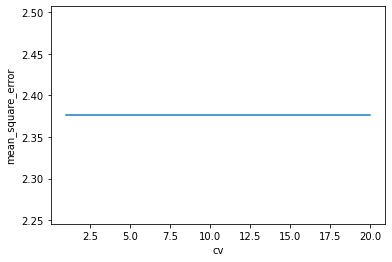

In [0]:
cv = [1,10,20] 
# corresponding y axis values 
mse = [2.3764,2.3764,2.3764] 
mae = [10.0647,10.0647,10.0647] 
# plotting the points  
plt.plot(cv,mse) 
  
# naming the x axis 
plt.xlabel('cv') 
# naming the y axis 
plt.ylabel('mean_square_error') 
plt.savefig('foo')

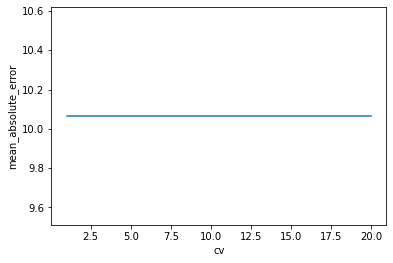

In [0]:
plt.plot(cv,mae) 
  
# naming the x axis 
plt.xlabel('cv') 
# naming the y axis 
plt.ylabel('mean_absolute_error') 
plt.savefig('foo')

In [0]:
class Regression:
  df = None
  y  = None
  ridge = RidgeCV(cv=5)
  def __init__(self,Data):
    self.df = Data
    self.y = Data['Binding Affinity']
    self.df.drop(columns='Binding Affinity',inplace=True)
    print(self.df.shape)
    print( self.y.shape)
    # print(self.df)
    # print( self.y)

  def Preprocessing(self,df_X):
    model = word2vec.Word2Vec.load('/content/drive/My Drive/model_300dim_kaggle.pkl')
    df_X['mol'] = df_X['SMILES sequence'].apply(lambda x: Chem.MolFromSmiles(x))
    df_X['sentence'] = df_X.apply(lambda x: MolSentence(mol2alt_sentence(x['mol'], 1)), axis=1)
    df_X['mol2vec'] = [DfVec(x) for x in sentences2vec(df_X['sentence'], model, unseen='UNK')]
    X = np.array([x.vec for x in df_X['mol2vec']])
    return X

  def train(self):
    X = self.Preprocessing(self.df)
    m_df = pd.DataFrame(X)
    # train_df = train_def()
    # new_df = pd.concat((m_df, train_df), axis=1)
    print(X.shape)
    X_train, X_test, y_train, y_test = train_test_split(m_df, self.y, test_size=.1, random_state=1)
    print("after",X_train.shape)
    print(y_train.shape)
    self.ridge.fit(X_train, y_train)
    print("hey")
    prediction = self.ridge.predict(X_test)
    mae = mean_absolute_error(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    print('MAE score:', round(mae, 4))
    print('MSE score:', round(mse,4))
    
  def test(self):
    testdf = pd.read_csv('/content/drive/My Drive/3adc8d2b-4db8-4d95-a013-6a8dea863fb0_test.csv')
    y_test = testdf['Binding Affinity']
    testdf.drop(columns='Binding Affinity',inplace=True)
    X_test = self.Preprocessing(testdf)
    m_df = pd.DataFrame(X_test)
    # print(m_df)
    train_df = train_def()
    train_df = train_df[0:X_test.shape[0]]
    print(train_df)
    new_df = pd.concat((m_df, train_df), axis=1)
    print(new_df)
    prediction = self.ridge.predict(new_df)
    return prediction


In [0]:
mdf= pd.read_csv('/content/drive/My Drive/22bba507-efcf-4af0-b9d0-f26193605457_train.csv')
reg = Regression(mdf)
reg.train()

(9000, 1)
(9000,)
(9000, 300)
after (8100, 300)
(8100,)
hey
MAE score: 1.7649
MSE score: 5.6485


In [0]:
C_values =[50,60,80,100,150]
mse = [4.807146652880561, 4.814496174034933, 4.833741325557602, 4.8549326182684895, 4.902401739052718]
mae = [1.5997367748927773, 1.598928677220362, 1.5991621786117618, 1.600487409217542, 1.6110004382268672]


Text(0.5, 1.0, 'svr using Kernal rbf')

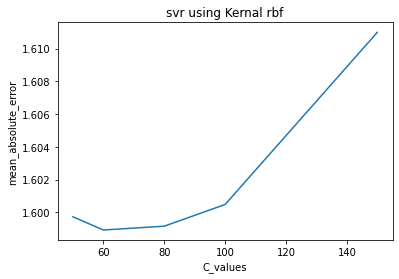

In [0]:
plt.plot(C_values,mae) 
  
# naming the x axis 
plt.xlabel('C_values') 
# naming the y axis 
plt.ylabel('mean_absolute_error') 
plt.savefig('foo')
plt.title('svr using Kernal rbf') 
